# §4 伝統的手法

#### Packageの読み込み

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### Dataの読み込み（セクション2のまとめ）

In [2]:
df1 = pd.read_csv("./csv/japan/newly_confirmed_cases_daily.csv")

# Indexを変更し日付型に変換
df2 = df1.set_index("Date")
df2.index = pd.to_datetime(df2.index)

# ①原系列の定義
df3 = df2[(df2.index >= '2020-05-01') & (df2.index <= '2023-04-30')]
df = df3[["ALL"]].copy()
df.rename(columns={"ALL": "original"}, inplace = True)

#### その他の変数の定義（セクション3のまとめ）

In [3]:
# ②移動平均の定義
df["MA"] = df["original"].rolling(window=7,min_periods=1).mean()

# ③対数系列の定義
c = 1e-5#ゼロを含むため極小さな値を入れる
df["log"] = np.log(df["original"]+c)

# ④一次差分系列の定義
df['1day_diff'] = df["original"].diff(1)

# ⑤季節階差（週トレンド）の定義
df['7day_diff'] =df ["original"].diff(7)

# ⑥対数1次差分系列
df["log_1day_diff"] = df["log"].diff(1) 

# ⑦対数7次差分系列
df["log_7day_diff"] = df["log"].diff(7)

# 欠損値の確認
df.head()
print(df.isna().sum())

original         0
MA               0
log              0
1day_diff        1
7day_diff        7
log_1day_diff    1
log_7day_diff    7
dtype: int64


#### コレログラムの描画

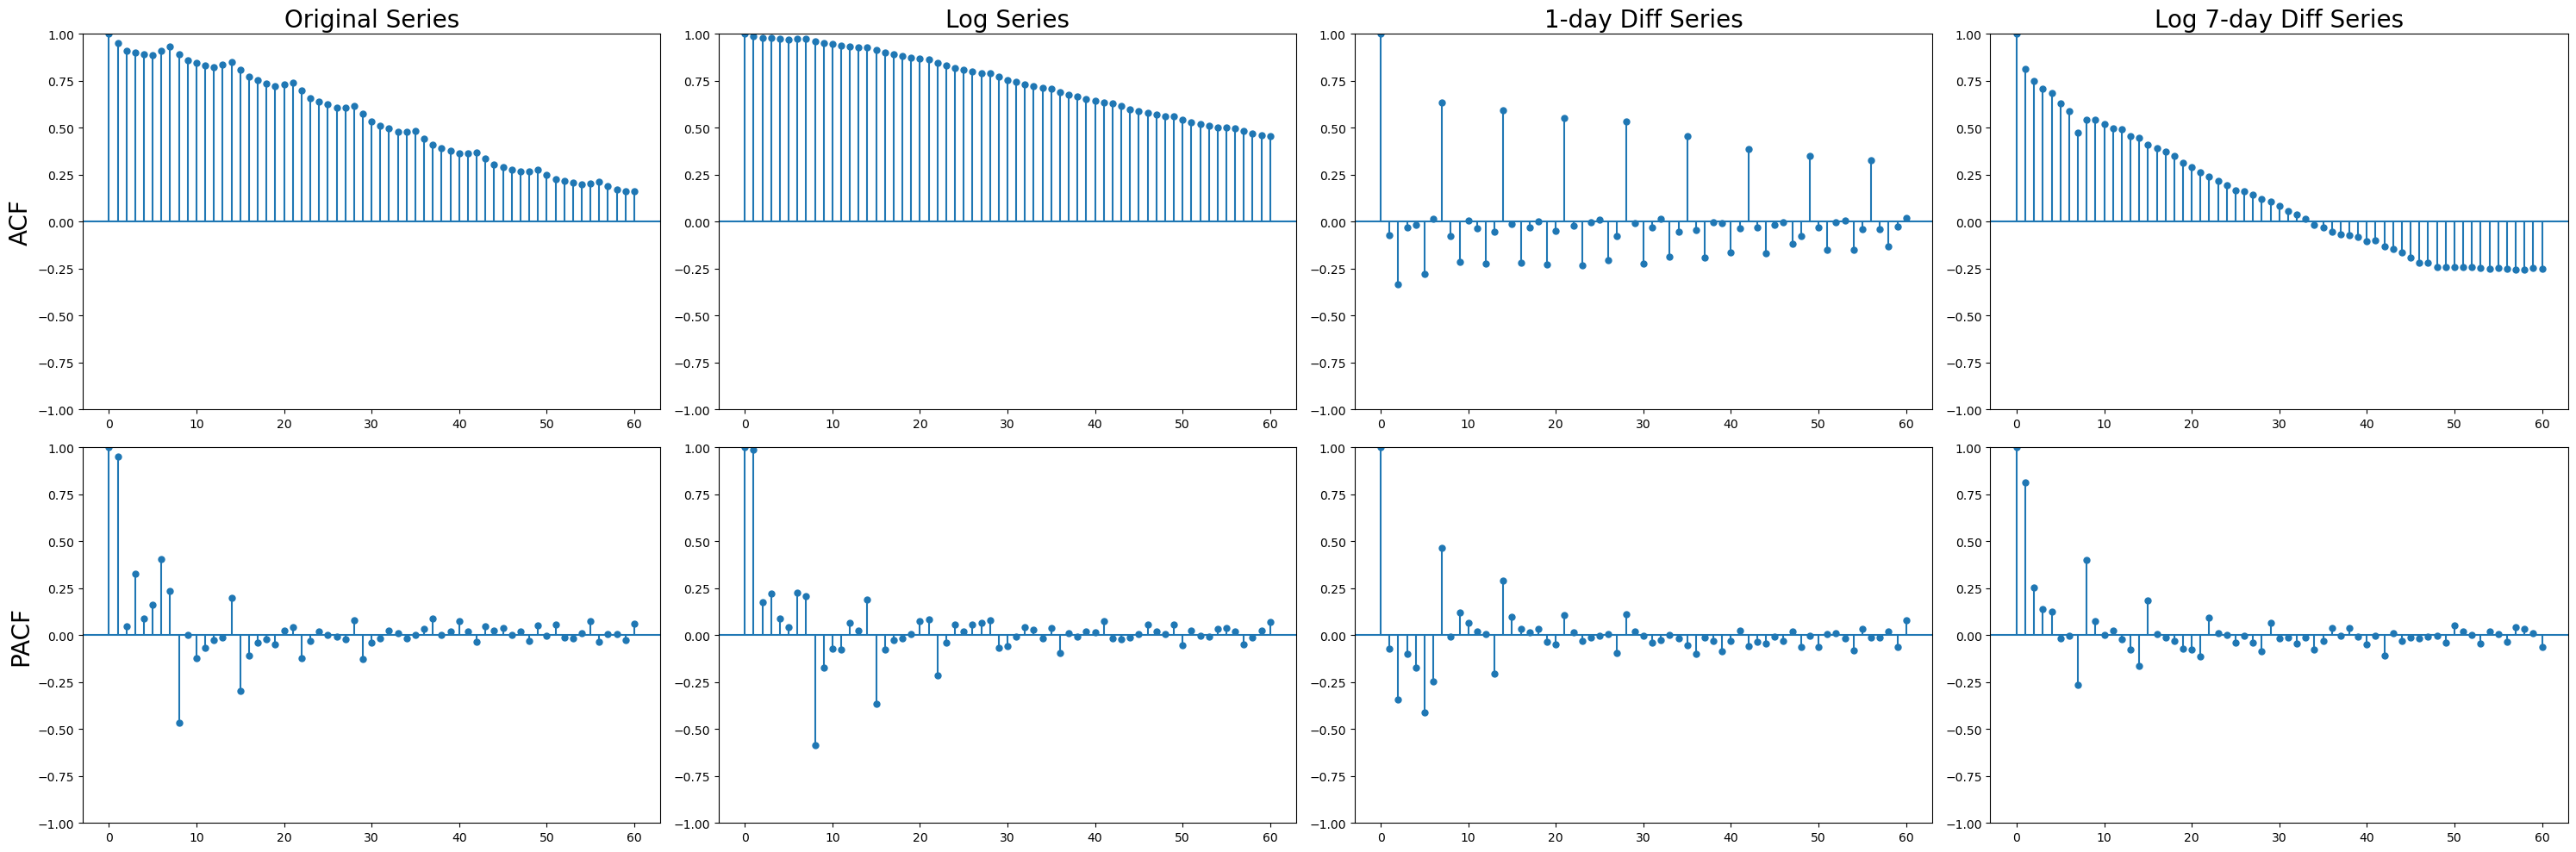

In [8]:
plt.figure(figsize=(30, 10))

# 原系列のプロット
ax1 = plt.subplot(2, 4, 1)
plot_acf(df["original"].dropna(), ax=ax1, lags=60, alpha=None, title='')
plt.title("Original Series", fontsize=20)
plt.ylabel("ACF", fontsize=20)

ax2 = plt.subplot(2, 4, 5)
plot_pacf(df["original"].dropna(), ax=ax2, lags=60, alpha=None, method='ywm', title='')
plt.ylabel("PACF", fontsize=20)

# 対数系列のプロット
ax3 = plt.subplot(2, 4, 2)
plot_acf(df["log"].dropna(), ax=ax3, lags=60, alpha=None, title='')
plt.title("Log Series", fontsize=20)

ax4 = plt.subplot(2, 4, 6)
plot_pacf(df["log"].dropna(), ax=ax4, lags=60, alpha=None, method='ywm', title='')

# 一次差分系列のプロット
ax5 = plt.subplot(2, 4, 3)
plot_acf(df["1day_diff"].dropna(), ax=ax5, lags=60, alpha=None, title='')
plt.title("1-day Diff Series", fontsize=20)

ax6 = plt.subplot(2, 4, 7)
plot_pacf(df["1day_diff"].dropna(), ax=ax6, lags=60, alpha=None, method='ywm', title='')

# 対数季節階差系列のプロット
ax7 = plt.subplot(2, 4, 4)
plot_acf(df["log_7day_diff"].dropna(), ax=ax7, lags=60, alpha=None, title='')
plt.title("Log 7-day Diff Series", fontsize=20)

ax8 = plt.subplot(2, 4, 8)
plot_pacf(df["log_7day_diff"].dropna(), ax=ax8, lags=60, alpha=None, method='ywm', title='')

plt.tight_layout()
plt.savefig("./image/acf_pacf.jpeg", dpi=300)
plt.show()


#### ADF検定 : Augmented Dickey-Fuller 

In [4]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df["original"])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.856797
p-value: 0.002377
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


#### KPSS検定 :Kwiatkowski-Phillips-Schmidt-Shin

In [5]:
from statsmodels.tsa.stattools import kpss

def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'     {key} : {value}')

kpss_test(df["original"])

KPSS Statistic: 2.0883086415372136
p-value: 0.01
Critical Values:
     10% : 0.347
     5% : 0.463
     2.5% : 0.574
     1% : 0.739


/var/folders/_p/6bfsjdds2kn54xwxmrh00ctc0000gp/T/ipykernel_59561/1464451481.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


*To be continue...*